Distances probability distribution visualizations

In [1]:
!pip install psycopg2
!pip install sqlalchemy
!pip install pydantic
!pip install seaborn

In [ ]:
import os
from mot_postgres.database_creator import DatabaseCreator
from mot_postgres.database_creator import DatabaseProps
import numpy as np
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print('imports finished')

dp = DatabaseProps()
dp.port = 8888
print('databaseProps finished')

os.environ["PGPASSWORD"] = 'neor123'
print('env variable finished')
dbc = DatabaseCreator(dp)

print('setup complete')

In [1]:
import pandas as pd
scenario = 'MOT20-05'
run_id = 3
df01 = dbc.get_distances_by_scenario(run_id, 'MOT20-01')
df02 = dbc.get_distances_by_scenario(run_id, 'MOT20-02')
df03 = dbc.get_distances_by_scenario(run_id, 'MOT20-03')
df05 = dbc.get_distances_by_scenario(run_id, 'MOT20-05')
# df_un = dbc.get_distances_for_unmatched(run_id,scenario)
# df = dbc.get_distances_for_matched_by_challenge(run_id,'MOT20')
print('loaded from database')

NameError: name 'dbc' is not defined

Joint histogram - probability density

C:\Users\amitg\AppData\Local\Continuum\anaconda3\envs\CVenv\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  import sys


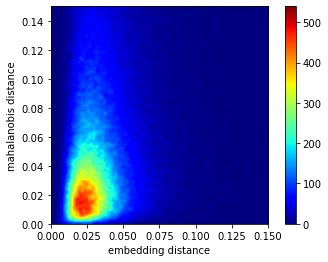

In [18]:
df2=df.copy()
df3=df2.loc[(df2['embedding_distance'] <0.15) & (df2['mahalanobis_distance'] <0.15)]
maha=df3.dropna()['mahalanobis_distance']
emb=df3.dropna()['embedding_distance']


h, x, y, p = plt.hist2d(emb,maha, bins=(100,100), cmap=plt.cm.jet, normed=True)
plt.clf()
plt.close()
plt.imshow(h.T, origin = "lower", interpolation = "bicubic", extent=[0,0.15,0,0.15], cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('embedding distance')
plt.ylabel('mahalanobis distance')
plt.savefig(f'./images/{scenario} joint_histogram_matched_smoothed run {run_id}.png')

Matched and unmatched joint histogram

In [ ]:
df2=df.copy()
df3=df2.loc[(df2['embedding_distance'] <0.15) & (df2['mahalanobis_distance'] <0.15)]
maha=df3.dropna()['mahalanobis_distance']
emb=df3.dropna()['embedding_distance']
df_un2=df_un.copy()
df_un3=df_un2.loc[(df_un2['embedding_distance'] <10) & (df_un2['mahalanobis_distance']<10)]
maha_un=df_un3.dropna()['mahalanobis_distance']
emb_un=df_un3.dropna()['embedding_distance']

a = plt.hist2d(emb,maha, bins=(100,100), cmap=plt.cm.jet,alpha=0.3,)
b = plt.hist2d(emb_un,maha_un, bins=(100,100), cmap=plt.cm.Oranges,alpha=0.8)
#plt.xlim((0,0.1))
plt.xlabel('embedding distance')
plt.ylabel('mahalanobis distance')

All histograms (matched) together

In [ ]:
df2_01=df01.copy()
df2_02=df02.copy()
df2_03=df03.copy()
df2_05=df05.copy()
df3_01=df2_01.loc[(df2_01['embedding_distance'] <0.15) & (df2_01['mahalanobis_distance'] <0.15)]
df3_02=df2_02.loc[(df2_02['embedding_distance'] <0.15) & (df2_02['mahalanobis_distance'] <0.15)]
df3_03=df2_03.loc[(df2_03['embedding_distance'] <0.15) & (df2_03['mahalanobis_distance'] <0.15)]
df3_05=df2_05.loc[(df2_05['embedding_distance'] <0.15) & (df2_05['mahalanobis_distance'] <0.15)]
df3=pd.concat([df3_01,df3_02,df3_03,df3_05])
maha=df3.dropna()['mahalanobis_distance']
emb=df3.dropna()['embedding_distance']


h, x, y, p = plt.hist2d(emb,maha, bins=(100,100), cmap=plt.cm.jet, normed=True)
plt.clf()
plt.close()
plt.imshow(h.T, origin = "lower", interpolation = "bicubic", extent=[0,0.15,0,0.15], cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('embedding distance')
plt.ylabel('mahalanobis distance')
plt.savefig(f'./images/{scenario} joint_histogram_matched_smoothed run {run_id}.png')

In [ ]:
em = df.dropna()['embedding_distance']
print(f'mean = {em.mean()}')
print(f'median = {em.median()}')
print(f'std = {em.std()}')
print(f'95 precentile = {np.percentile(em.values, 95)}')


In [ ]:
md = df.loc[df['mahalanobis_distance'] <0.3]
a = plt.hist(md['mahalanobis_distance'], bins=200)
plt.xlabel('mahalanobis distance')
plt.ylabel('count')
plt.tight_layout()
plt.savefig(f'latex_files/assosiaction/images/{scenario} clipped mahalanobis_distance run {run_id}.png')

In [ ]:
em = df.dropna()['mahalanobis_distance']
print(f'mean = {em.mean()}')
print(f'median = {em.median()}')
print(f'std = {em.std()}')
print(f'95 precentile = {np.percentile(em.values, 95)}')


In [ ]:
with open('latex.txt', 'w') as f:
    f.write(df.loc[df['frame_id'] == 2].head().to_latex())

In [ ]:
df['mahalanobis_distance'].values

In [ ]:
stds2

In [ ]:
means2

In [ ]:
stds = []
n = 10
fig, axes = plt.subplots(1,n -1, figsize = (12,12))
means = []

confidances = np.linspace(0.6, 1, n)

for idx, confidance in enumerate(confidances):
    if idx == n - 1:
        break
    df_C = df.loc[(df['confidance'] >= confidance) & (df['confidance'] < confidances[idx + 1])]
    axes[idx].set_title(f'histogram with confidance {confidance}<= conf <{round(confidances[idx + 1], 1)}')
    ratio = df_C['diff_min_x']/df_C['gt_height']
    axes[idx].hist(ratio , bins=128)
    axes[idx].set_xlabel("x diff/ height")
    stds.append(ratio.std())
    means.append(ratio.mean())
    axes[idx].set_ylabel("count")
plt.savefig(f'/home/neor/Thesis/database/latex_files/MOT20-03_confidance_histogram.png')

In [ ]:
df_C

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(confidances[:-2],stds[:-1], label='std mot20' )
plt.plot(confidances[:-2],means[:-1], label='mean mot 20' )
plt.xlabel('confidance')
plt.xlabel('value')
plt.legend()
# plt.savefig(f'/home/neor/Thesis/database/latex_files/graph_conf-stats.png')

In [ ]:
x1 = 0.6
y1 = stds[0]

x2 = 0.9
y2 = stds[-2]

a = (y2 - y1) / (x2 - x1)
b = y1 - a * x1

print('slope: ', a)
print('intercept: ', b)

In [ ]:
len(confidances)

In [ ]:
confidances = np.linspace(0.6, 1, 10)


In [ ]:
stds

In [ ]:
confidance[idx + 1]

In [ ]:
idx